# Disaster Tweets Classification Project

This notebook analyzes tweets to classify them as disaster-related or not.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

## Load the Data

In [2]:
# Load the training data
train_df = pd.read_csv('train.csv')

# Display first few rows
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Exploratory Data Analysis (EDA)

In [3]:
# Get basic info about the dataset
print(f"Dataset Shape: {train_df.shape}")
print("\nDataset Info:")
train_df.info()

Dataset Shape: (7613, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
# Check for missing values
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("Missing Values:")
print(missing_df)

Missing Values:
          Missing Values  Percentage
id                     0    0.000000
keyword               61    0.801261
location            2533   33.272035
text                   0    0.000000
target                 0    0.000000


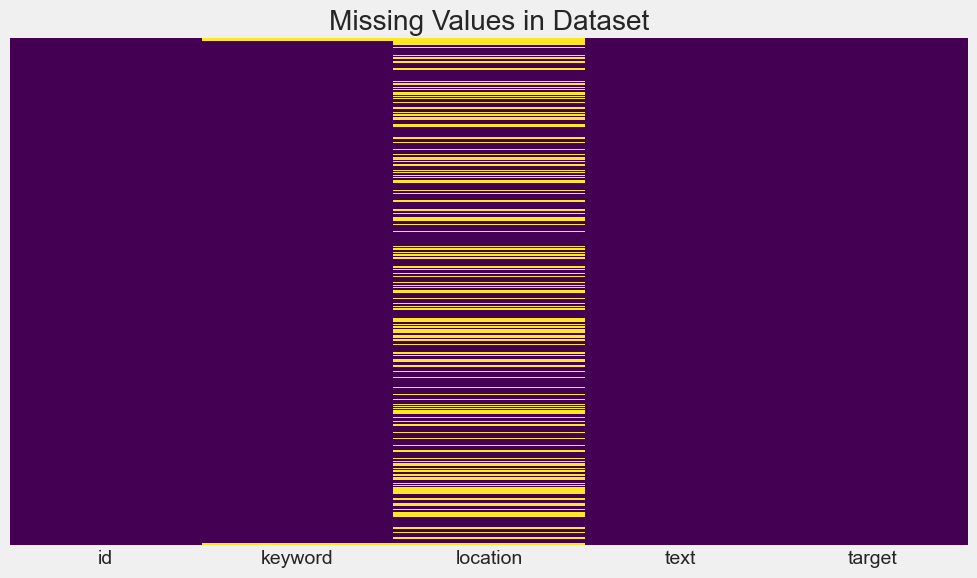

In [5]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.tight_layout()
plt.show()

In [6]:
# Check for duplicates
duplicates = train_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# If there are duplicates, examine them
if duplicates > 0:
    print("\nExample of duplicate rows:")
    train_df[train_df.duplicated(keep=False)].sort_values(by=train_df.columns.tolist()).head()

Number of duplicate rows: 0


### Class Distribution Analysis

In [7]:
# Check class distribution (target variable)
target_counts = train_df['target'].value_counts()
target_percentage = 100 * target_counts / len(train_df)

# Create a dataframe for better display
target_df = pd.DataFrame({
    'Count': target_counts,
    'Percentage': target_percentage
})

target_df.index = ['Not Disaster (0)', 'Disaster (1)'] if 0 in target_df.index else target_df.index
print("Class Distribution:")
print(target_df)

Class Distribution:
                  Count  Percentage
Not Disaster (0)   4342   57.034021
Disaster (1)       3271   42.965979


/var/folders/77/c83pn28s2xs90lp04bwq074c0000gn/T/ipykernel_4096/3028126910.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=train_df, palette='viridis')


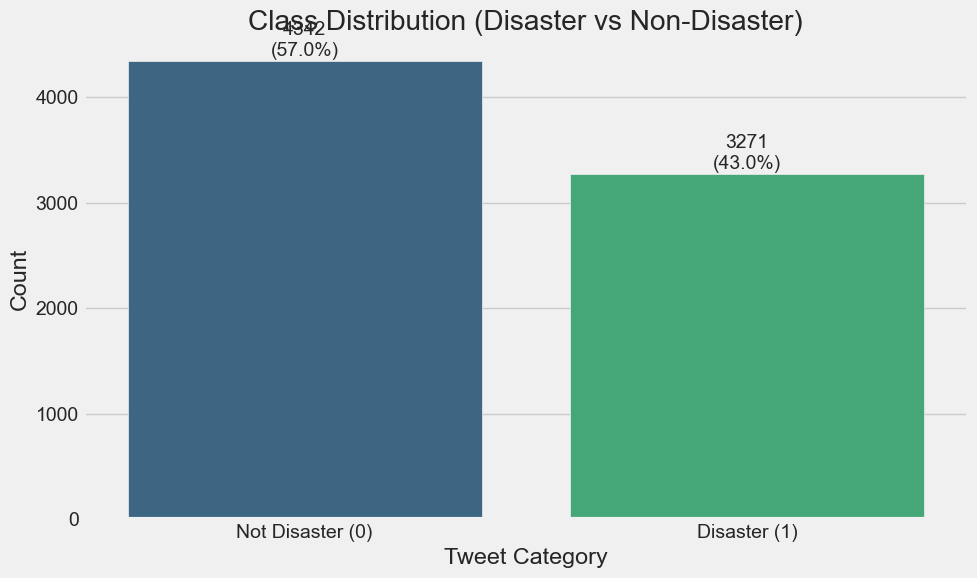

In [8]:
# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=train_df, palette='viridis')
plt.title('Class Distribution (Disaster vs Non-Disaster)')
plt.xlabel('Tweet Category')
plt.xticks([0, 1], ['Not Disaster (0)', 'Disaster (1)'])
plt.ylabel('Count')

# Add count and percentage labels on top of bars
for i, count in enumerate(target_counts):
    percentage = f"{target_percentage[i]:.1f}%"
    plt.text(i, count + 50, f"{count}\n({percentage})", ha='center')
    
plt.tight_layout()
plt.show()

### Keyword and Location Analysis

In [9]:
# Analyze keywords
print(f"Number of unique keywords: {train_df['keyword'].nunique()}")
print(f"Percentage of tweets with keywords: {100 * (1 - train_df['keyword'].isna().mean()):.2f}%")

# Top 10 most common keywords
top_keywords = train_df['keyword'].value_counts().head(10)
print("\nTop 10 most common keywords:")
print(top_keywords)

Number of unique keywords: 221
Percentage of tweets with keywords: 99.20%

Top 10 most common keywords:
keyword
fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
Name: count, dtype: int64


In [10]:
# Analyze locations
print(f"Number of unique locations: {train_df['location'].nunique()}")
print(f"Percentage of tweets with location: {100 * (1 - train_df['location'].isna().mean()):.2f}%")

# Top 10 most common locations
top_locations = train_df['location'].value_counts().head(10)
print("\nTop 10 most common locations:")
print(top_locations)

Number of unique locations: 3341
Percentage of tweets with location: 66.73%

Top 10 most common locations:
location
USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: count, dtype: int64


### Text Length Analysis

In [11]:
# Add text length as a feature
train_df['text_length'] = train_df['text'].str.len()

# Summary statistics for text length
print("Text Length Statistics:")
print(train_df['text_length'].describe())

Text Length Statistics:
count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64


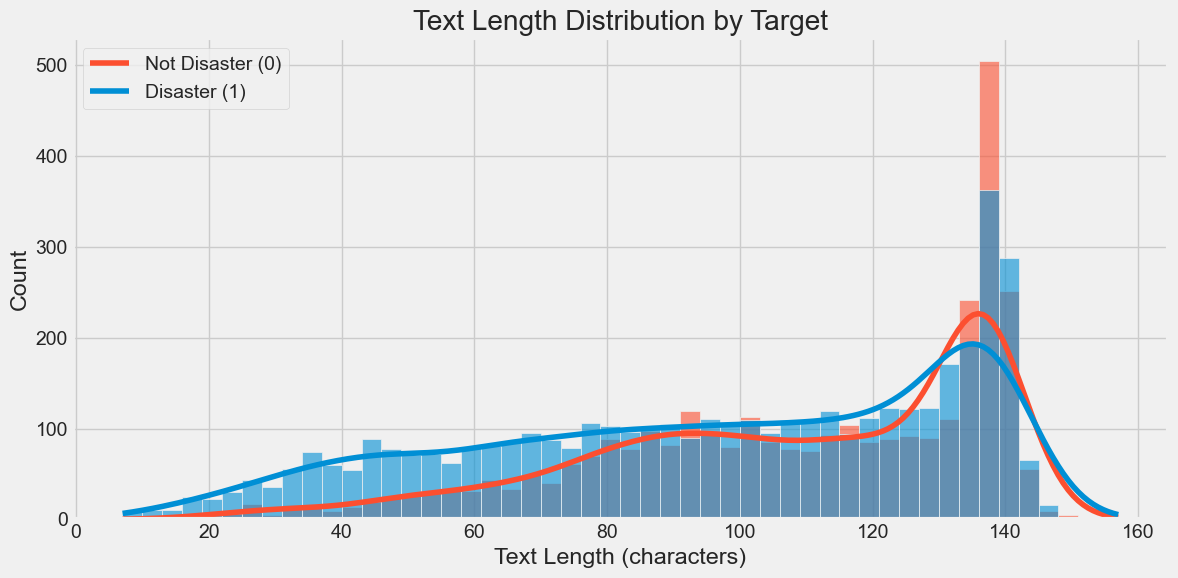

In [12]:
# Visualize text length distribution by target
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='text_length', hue='target', kde=True, bins=50, alpha=0.6)
plt.title('Text Length Distribution by Target')
plt.xlabel('Text Length (characters)')
plt.ylabel('Count')
plt.legend(['Not Disaster (0)', 'Disaster (1)'])
plt.tight_layout()
plt.show()

/var/folders/77/c83pn28s2xs90lp04bwq074c0000gn/T/ipykernel_4096/1108200475.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='text_length', data=train_df, palette='viridis')


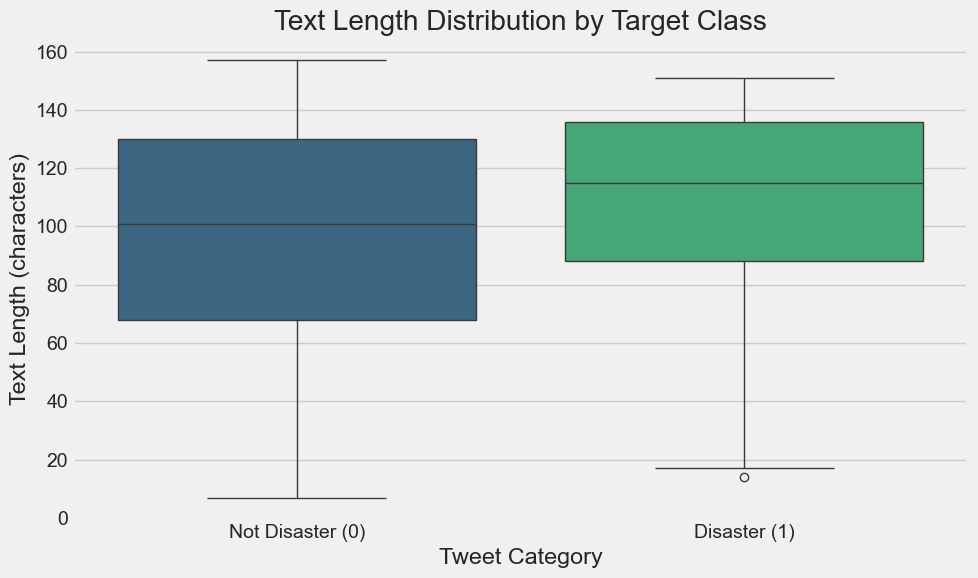

In [13]:
# Box plot of text length by target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='text_length', data=train_df, palette='viridis')
plt.title('Text Length Distribution by Target Class')
plt.xlabel('Tweet Category')
plt.xticks([0, 1], ['Not Disaster (0)', 'Disaster (1)'])
plt.ylabel('Text Length (characters)')
plt.tight_layout()
plt.show()

### Correlation between Keywords and Target

In [14]:
# Find keywords most associated with disasters
keyword_target = train_df.groupby('keyword')['target'].mean().sort_values(ascending=False)

# Top 15 keywords most associated with disasters
print("Top 15 Keywords Most Associated with Disasters:")
print(keyword_target.head(15))

# Top 15 keywords least associated with disasters
print("\nTop 15 Keywords Least Associated with Disasters:")
print(keyword_target.tail(15))

Top 15 Keywords Most Associated with Disasters:
keyword
debris                1.000000
wreckage              1.000000
derailment            1.000000
outbreak              0.975000
oil%20spill           0.973684
typhoon               0.973684
suicide%20bombing     0.969697
suicide%20bomber      0.967742
bombing               0.931034
rescuers              0.914286
suicide%20bomb        0.914286
nuclear%20disaster    0.911765
evacuated             0.888889
razed                 0.885714
wildfire              0.878788
Name: target, dtype: float64

Top 15 Keywords Least Associated with Disasters:
keyword
epicentre      0.083333
panic          0.081081
explode        0.078947
wrecked        0.076923
blight         0.062500
panicking      0.060606
blew%20up      0.060606
traumatised    0.057143
screaming      0.055556
electrocute    0.031250
body%20bag     0.030303
blazing        0.029412
ruin           0.027027
body%20bags    0.024390
aftershock     0.000000
Name: target, dtype: float64


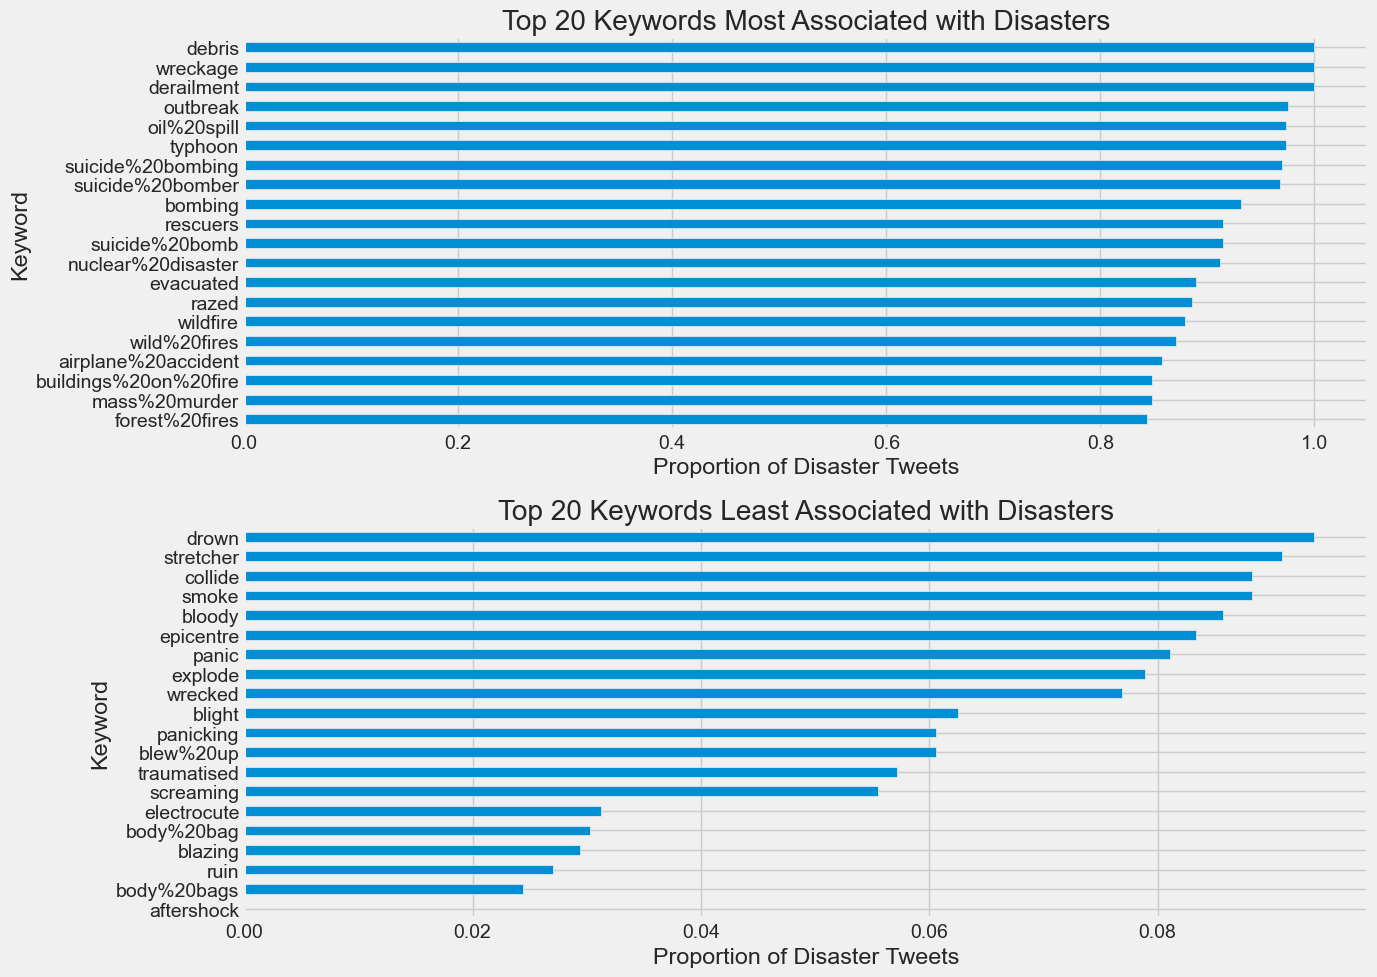

In [15]:
# Visualize top keywords and their disaster association
# Filter to keywords with at least 10 occurrences for more reliable results
keyword_counts = train_df['keyword'].value_counts()
common_keywords = keyword_counts[keyword_counts >= 10].index

# Filter keyword_target to include only common keywords
common_keyword_target = keyword_target[keyword_target.index.isin(common_keywords)]

# Plot top 20 most and least disaster-related common keywords
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
common_keyword_target.head(20).sort_values().plot(kind='barh')
plt.title('Top 20 Keywords Most Associated with Disasters')
plt.xlabel('Proportion of Disaster Tweets')
plt.ylabel('Keyword')

plt.subplot(2, 1, 2)
common_keyword_target.tail(20).sort_values().plot(kind='barh')
plt.title('Top 20 Keywords Least Associated with Disasters')
plt.xlabel('Proportion of Disaster Tweets')
plt.ylabel('Keyword')

plt.tight_layout()
plt.show()